In [1]:
%matplotlib inline
import math
import numpy as np
from matplotlib import cm
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [2]:
def implied_vol(F, T, K):
    etaT = eta / math.sqrt(T)
    l = etaT / alpha
    logK = math.log(K / F)
    return alpha * (1 + 1/2 * rho * l * logK + 1 / 12 * (2 - 3 * rho ** 2) * (l * logK) ** 2)

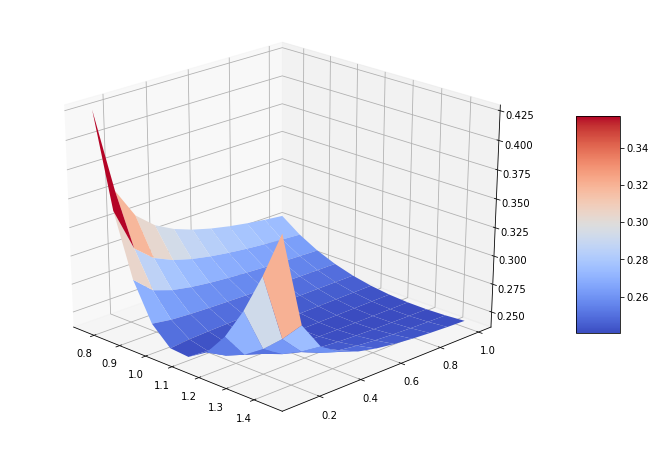

In [32]:
eta = 0.5
rho = -0.3
alpha = 0.25

n = 12
expiries = np.linspace(0, 1, n)[1:]
strikes = np.linspace(0.7, 1.45, n)[1:]
forwards = np.array([1.0] * n)
    
implied_vols = np.zeros((len(expiries),len(strikes)))
for expiry in range(len(expiries)):
    for strike in range(len(strikes)):
        implied_vols[expiry, strike] = implied_vol(forwards[expiry], expiries[expiry], strikes[strike])
        
strike_axis, expiries_axis = np.meshgrid(strikes, expiries)
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
surface = ax.plot_surface(strike_axis, expiries_axis, implied_vols, cmap=cm.coolwarm)
ax.view_init(25, -45)
fig.colorbar(surface, shrink=0.5, aspect=5)
plt.show()